# Exploratory Data Analysis (EDA)  
## ClinVar Conflicting Variant Classification

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('../data/raw/clinvar_conflicting.csv',
                 dtype={'CHROM': str})


/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/881134861.py:8: DtypeWarning: Columns (38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/clinvar_conflicting.csv',


In [85]:
# Vista general del conjunt de dades
print("Forma")
print(df.shape)

print("Tipus de dades")
df.info()



Forma
(65188, 46)
Tipus de dades
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  

In [86]:
df.head(15)


,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,B3GALT6,Transcript,NM_080605.3,protein_coding,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,NaN,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,0,A,missense_variant,MODERATE,TMEM240,Transcript,NM_001114748.1,protein_coding,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,OK,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,1,G,missense_variant,MODERATE,GNB1,Transcript,NM_002074.4,protein_coding,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,OK,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,A,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,T,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
5,1,2160554,G,C,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160554G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):P12755#VAR_071183,SO:0001583|missense_variant,33,NaN,0,C,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,381,349,117,G/R,Ggc/Cgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.700,4.079099,-2.0
6,1,3328358,T,C,0.0000,0.00000,0.0000,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.3328358T>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q9HAZ2#VAR_031433,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,PRDM16,Transcript,XM_005244772.1,protein_coding,9/17,NaN,1858,1600,534,S/P,Tcg/Ccg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101,0.172,-0.543433,-1.0
7,1,3328659,C,T,0.1523,0.13103,0.1060,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.3328659C>T,NaN,single_nucleotide_variant,UniProtKB_(protein):Q9HAZ2#VAR_031434,SO:0001583|missense_variant,1,NaN,0,T,missense_variant,MODERATE,PRDM16,Transcript,XM_005244772.1,protein_coding,9/17,NaN,2159,1901,634,P/L,cCt/cTt,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101,23.000,3.424422,-3.0
8,1,3347452,G,A,0.0000,0.00357,0.0030,"MedGen:C3809288,OMIM:615373|MedGen:CN169374|Me...",NaN,Left_ventricular_noncompaction_8|not_specified...,NaN,NC_000001.10:g.3347452G

## Distribucio de la variable objectiu (CLASS)

El grafic mostra un desbalanceig on **CLASS=0** es majoritaria (~75%) i **CLASS=1** representa ~25%.


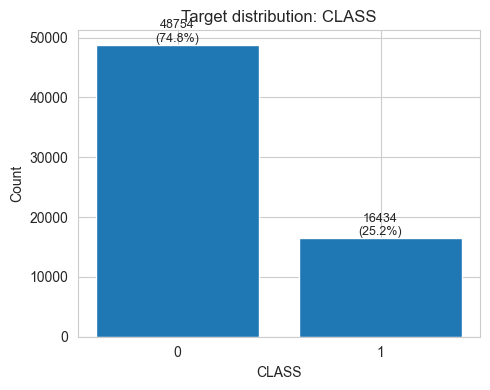

In [87]:
# Distribucio de la variable objectiu
counts = df["CLASS"].value_counts().sort_index()
pct = df["CLASS"].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(5, 4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Target distribution: CLASS")
plt.xlabel("CLASS")
plt.ylabel("Count")
for i, v in enumerate(counts.values):
    plt.text(i, v, f"{v}\n({pct.iloc[i]:.1f}%)", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()



## Valors nuls

L’anàlisi dels valors nuls permet avaluar la qualitat i completitud del dataset. El gràfic de percentatge de valors absents mostra que diverses variables presenten una proporció molt elevada de missing values, incloent columnes amb pràcticament absència total d’informació. Aquest patró suggereix que algunes variables poden no ser útils per al modelatge i haurien de ser considerades per eliminació en la fase de preprocessament. En canvi, altres variables amb percentatges intermedis de missing, com SIFT o PolyPhen, podrien contenir informació rellevant quan estan presents, i la seva absència podria fins i tot tenir valor informatiu. Per aquest motiu, es defineix un llindar del 95% de missing per identificar variables candidates a ser descartades en etapes posteriors.


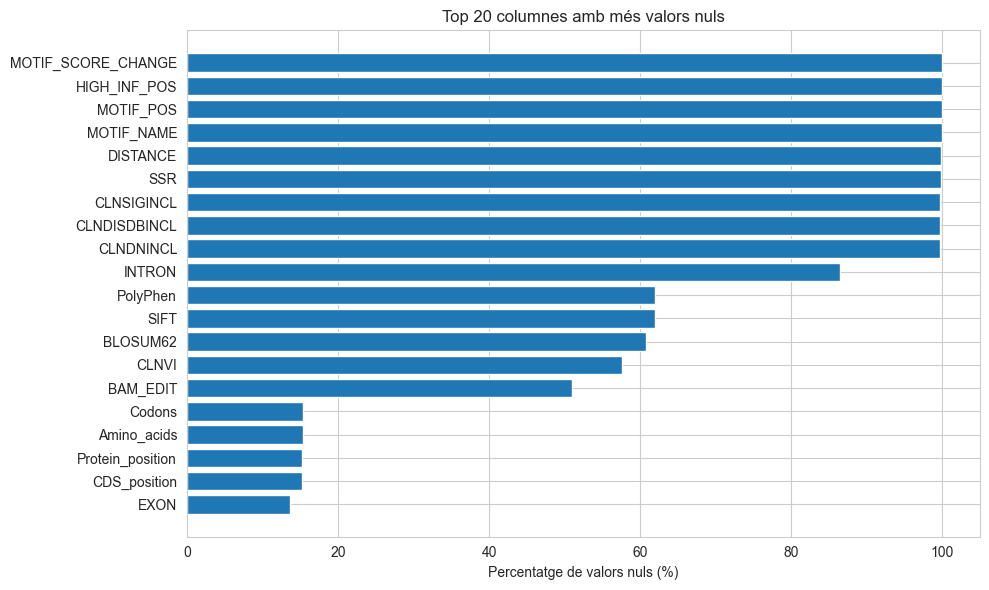

Columnes amb >95.0% valors nuls: 9
['MOTIF_SCORE_CHANGE', 'HIGH_INF_POS', 'MOTIF_POS', 'MOTIF_NAME', 'DISTANCE', 'SSR', 'CLNSIGINCL', 'CLNDISDBINCL', 'CLNDNINCL']


In [88]:
# Valors nuls globals
missing_tbl = (
    df.isna()
      .mean()
      .mul(100)
      .sort_values(ascending=False)
      .to_frame("missing_%")
)
missing_tbl["dtype"] = df.dtypes.astype(str)
missing_tbl["nunique"] = df.nunique(dropna=True)
missing_tbl["n_missing"] = df.isna().sum()

# Principals columnes amb mes valors nuls
top_n = 20
top_missing = missing_tbl[missing_tbl["missing_%"] > 0].head(top_n).copy()

plt.figure(figsize=(10, 6))
plt.barh(top_missing.index[::-1], top_missing["missing_%"][::-1])
plt.xlabel("Percentatge de valors nuls (%)")
plt.title(f"Top {top_n} columnes amb més valors nuls")
plt.tight_layout()
plt.show()

# Columnes que superen el llindar
DROP_MISSING_THRESHOLD = 95.0
cols_drop_missing = missing_tbl.index[missing_tbl["missing_%"] > DROP_MISSING_THRESHOLD].tolist()
print(f"Columnes amb >{DROP_MISSING_THRESHOLD}% valors nuls: {len(cols_drop_missing)}")
print(cols_drop_missing[:30])



## Valors nuls per Classe (CLASS)

L’anàlisi del percentatge de valors absents segmentat per classe mostra que, en general, els valors nuls son similars entre **CLASS=0** i **CLASS=1**. Tot i que s’observen petites diferències en algunes variables, aquestes són moderades i no indiquen un patró clarament diferenciat entre classes. Per tant, la presència de valors nuls no sembla estar fortament associada amb la variable objectiu. 

/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/2547060561.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_cls = df.groupby(target).apply(lambda g: g.isna().mean() * 100).T


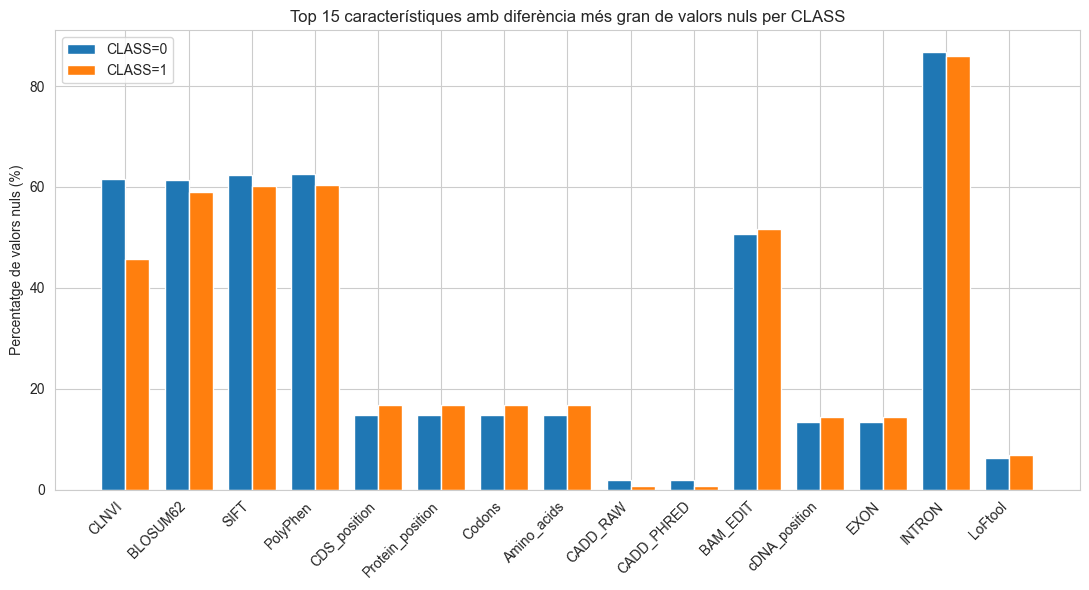

In [89]:
# Valors nuls per classe
target = "CLASS"

# Percentatge de valors nuls per columna i classe
missing_by_cls = df.groupby(target).apply(lambda g: g.isna().mean() * 100).T
missing_by_cls = missing_by_cls.drop(index=target, errors="ignore")

# Diferencia absoluta de valors nuls entre classes
missing_by_cls["diff_abs"] = (missing_by_cls[0] - missing_by_cls[1]).abs()

top_n = 15
top = missing_by_cls.sort_values("diff_abs", ascending=False).head(top_n)

x = np.arange(len(top.index))
width = 0.38

plt.figure(figsize=(11, 6))
plt.bar(x - width/2, top[0].values, width, label="CLASS=0")
plt.bar(x + width/2, top[1].values, width, label="CLASS=1")

plt.xticks(x, top.index, rotation=45, ha="right")
plt.ylabel("Percentatge de valors nuls (%)")
plt.title(f"Top {top_n} característiques amb diferència més gran de valors nuls per CLASS")
plt.legend()
plt.tight_layout()
plt.show()


## Variables Genòmiques Bàsiques: CHROM, POS, REF i ALT

Les variables genòmiques bàsiques descriuen la localització i la naturalesa molecular de cada variant. **CHROM** identifica el cromosoma on es troba la variant, **POS** indica la seva posició exacta dins del cromosoma, mentre que **REF** i **ALT** representen respectivament l’al·lel de referència i l’al·lel alternatiu observat. Aquestes variables constitueixen la definició única de cada variant i són essencials per comprendre la seva distribució i possible relació amb la presència de conflictes en la classificació.

### Distribució de CLASS per Cromosoma

El gràfic mostra el nombre absolut de variants consistents i conflictives per cromosoma. S’observa que alguns cromosomes, com el cromosoma 2, presenten un volum total de variants considerablement superior, tant en variants consistents com conflictives. Aquest resultat reflecteix principalment el nombre total de variants registrades en cada cromosoma i no necessàriament una major propensió al conflicte.


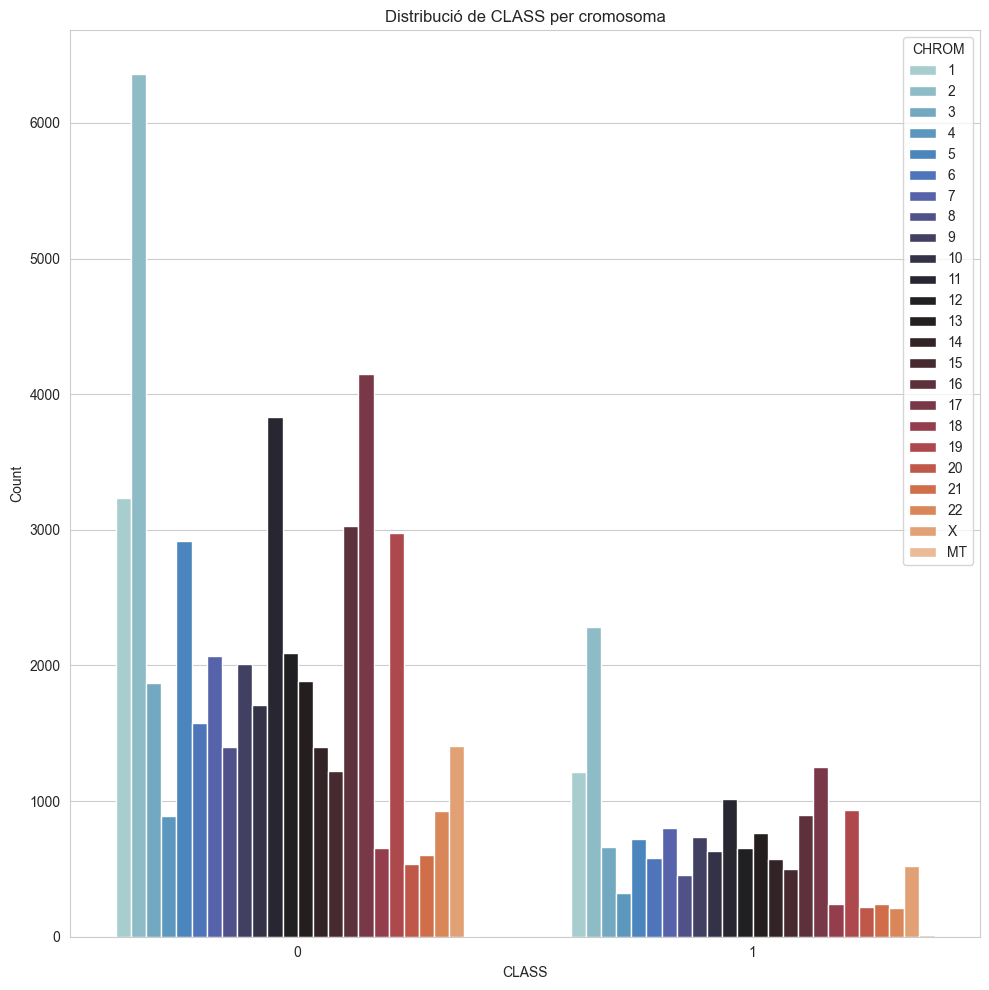

In [90]:
# Variables genòmiques bàsiques

basic_cols = ["CHROM", "POS", "REF", "ALT"]
for c in basic_cols:
    assert c in df.columns, f"Falta columna: {c}"

# Recompte de classes per cromosoma
plt.figure(figsize=(10, 10))
sns.countplot(x="CLASS", data=df, hue="CHROM", palette="icefire")
plt.title("Distribució de CLASS per cromosoma")
plt.xlabel("CLASS")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Taxa de Conflicte per Cromosoma

El gràfic mostra la proporció de variants conflictives dins de cada cromosoma, permetent comparar el risc relatiu de discrepància entre laboratoris de manera normalitzada. S’observa que, excepte el cromosoma mitocondrial (MT), que presenta una taxa considerablement superior però amb un nombre reduït de registres, la majoria de cromosomes mostren valors relativament homogenis, situats aproximadament entre el 18% i el 29%.

Aquesta distribució suggereix que el conflicte en la classificació no es concentra de manera marcada en cromosomes específics, sinó que es distribueix de forma bastant uniforme al llarg del genoma. Les diferències observades són moderades i podrien estar influïdes pel volum de variants disponibles en cada cromosoma.

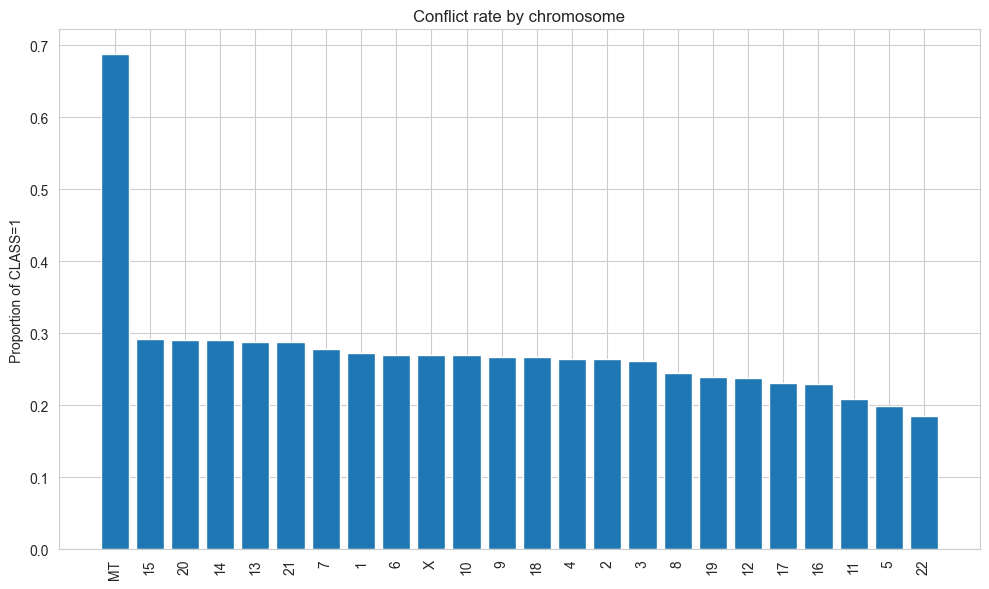

In [91]:
# Taxa de conflicte per cromosoma
chrom_conflict_rate = (
    df.groupby("CHROM")["CLASS"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
plt.bar(chrom_conflict_rate.index, chrom_conflict_rate.values)
plt.ylabel("Proportion of CLASS=1")
plt.title("Conflict rate by chromosome")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Distribució de la Posició Genòmica (POS)

L’histograma de la variable **POS** mostra que la distribució de variants al llarg del genoma no és uniforme, sinó que presenta múltiples pics i regions amb elevada concentració de registres. Aquest comportament suggereix l’existència de zones genòmiques amb major densitat de variants reportades, possiblement associades a gens clínicament rellevants o a regions àmpliament estudiades.

La major concentració observada en rangs baixos de posició pot estar relacionada amb la longitud variable dels cromosomes i amb el fet que **POS** representa coordenades internes a cada cromosoma. 

En conjunt, la variable **POS** reflecteix l’heterogeneïtat espacial de les variants en el genoma, però per si sola no permet inferir directament el risc de conflicte sense considerar el context cromosòmic o funcional.

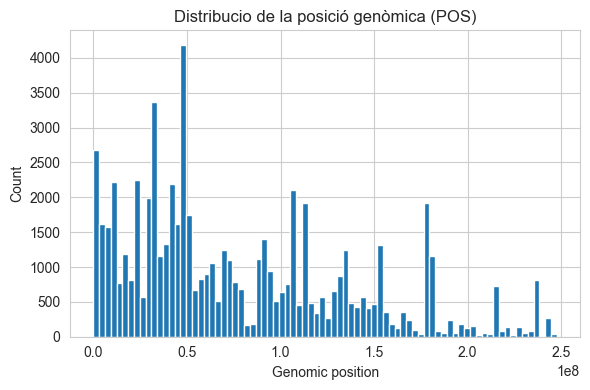

In [92]:
# Distribucio de POS
plt.figure(figsize=(6, 4))
plt.hist(df["POS"], bins=80)
plt.title("Distribucio de la posició genòmica (POS)")
plt.xlabel("Genomic position")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Distribució dels Al·lels de Referència (REF) i Alternatius (ALT)

L’anàlisi de les freqüències dels valors més comuns de **REF** i **ALT** confirma que la gran majoria de variants corresponen a substitucions simples de nucleòtids (A, C, G i T), és a dir, *Single Nucleotide Variants (SNVs)*. Les combinacions de múltiples nucleòtids, associades a insercions o delecions curtes, representen una proporció molt reduïda del conjunt de dades.

S’observa una lleugera asimetria entre els nucleòtids de referència i els alternatius, amb una major presència de C i G en **REF** i de T i A en **ALT**. En conjunt, aquesta distribució indica que el problema de classificació es concentra principalment en variants puntuals.

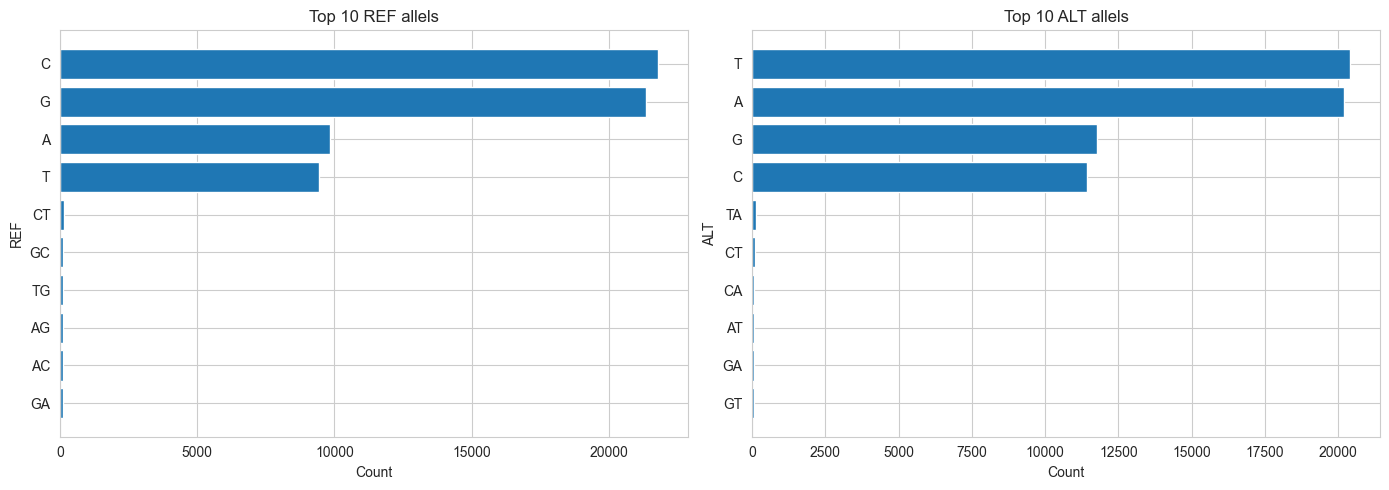

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# REF
ref_counts = df["REF"].value_counts().head(10)
axes[0].barh(ref_counts.index[::-1], ref_counts.values[::-1])
axes[0].set_title("Top 10 REF allels")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("REF")

# ALT
alt_counts = df["ALT"].value_counts().head(10)
axes[1].barh(alt_counts.index[::-1], alt_counts.values[::-1])
axes[1].set_title("Top 10 ALT allels")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("ALT")

plt.tight_layout()
plt.show()


### Distribució de les Freqüències

Els histogrames mostren que les tres variables presenten una distribució fortament asimètrica cap a la dreta, amb una elevada concentració de valors molt propers a zero. Aquest comportament és coherent amb la naturalesa del dataset, ja que la majoria de variants clíniques són rares en la població general. La forta asimetria suggereix que en fases posteriors podria ser convenient aplicar transformacions com ara escala logarítmica o discretització per reduir l’efecte de la cua llarga.

### Comparació per Classe

Els boxplots segmentats per `CLASS` indiquen que la mediana de les freqüències al·lèliques és pràcticament nul·la en ambdues classes, fet que confirma que la majoria de variants són rares independentment del seu estat de conflicte. Tanmateix, s’observa una lleugera diferència en la dispersió i en la distribució de valors no nuls, suggerint que les variants conflictives tendeixen a concentrar-se en rangs de baixa freqüència però no extremadament rars. Aquest patró és coherent amb la pràctica clínica, on les variants molt comunes solen estar clarament classificades com a benignes, mentre que variants rares poden generar més incertesa i discrepàncies entre laboratoris.

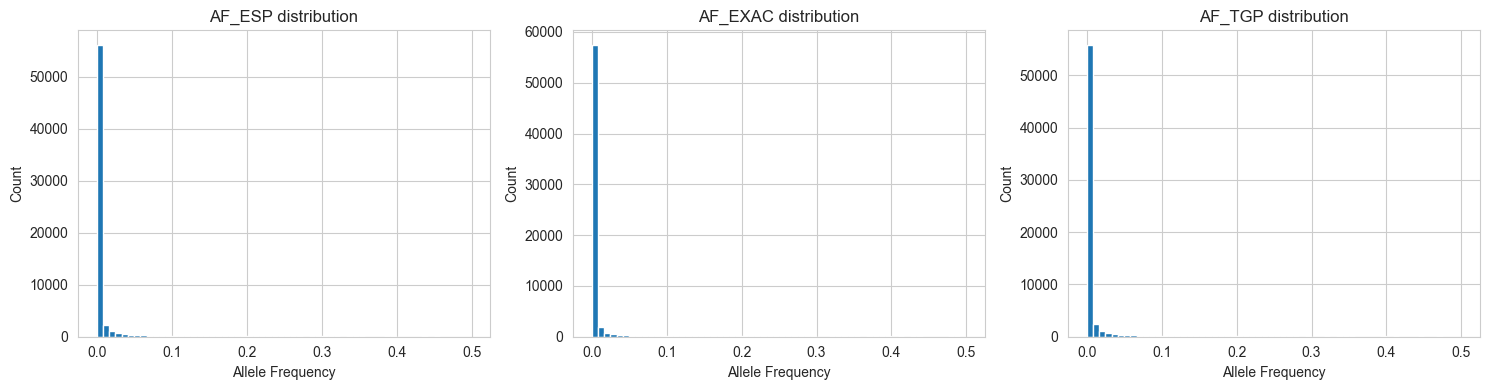

/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/1237378345.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=["0", "1"], showfliers=False)
/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/1237378345.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=["0", "1"], showfliers=False)
/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/1237378345.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=["0", "1"], showfliers=False)


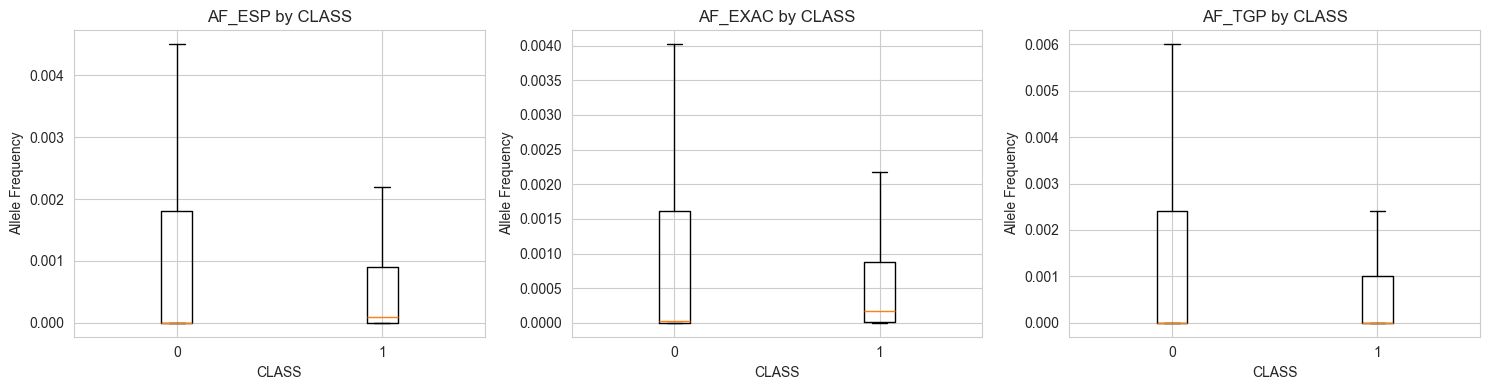

In [94]:
# Frequencies alleliques
af_cols = [c for c in ["AF_ESP", "AF_EXAC", "AF_TGP"] if c in df.columns]

# Convertim a numeric i assignem NaN quan no es pot convertir
for c in af_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Histogrames
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(af_cols):
    axes[i].hist(df[col].dropna(), bins=60)
    axes[i].set_title(f"{col} distribution")
    axes[i].set_xlabel("Allele Frequency")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Diagrames de caixa per classe
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(af_cols):
    data0 = df.loc[df["CLASS"] == 0, col].dropna()
    data1 = df.loc[df["CLASS"] == 1, col].dropna()
    axes[i].boxplot([data0, data1], labels=["0", "1"], showfliers=False)
    axes[i].set_title(f"{col} by CLASS")
    axes[i].set_xlabel("CLASS")
    axes[i].set_ylabel("Allele Frequency")

plt.tight_layout()
plt.show()



## Correlació de Variables Numèriques amb CLASS

La matriu de correlació permet analitzar les relacions lineals entre les variables numèriques del dataset, incloent la variable objectiu **CLASS**. Les correlacions observades amb **CLASS** són generalment baixes en valor absolut, fet que indica que no existeix un únic predictor numèric amb forta relació lineal amb la presència de conflicte. Això suggereix que el patró predictiu és probablement multivariable i pot incloure interaccions no lineals entre característiques.

### Observacions Relevants de la Matriu

S’observa una alta correlació positiva entre **CADD_PHRED** i **CADD_RAW**, fet esperable ja que ambdues mesures provenen del mateix sistema d’anotació funcional. De manera similar, les tres freqüències al·lèliques presenten correlacions elevades entre si, atès que descriuen la mateixa propietat en diferents cohorts poblacionals. En canvi, la relació entre aquestes variables i **CLASS** és negativa però moderada, la qual cosa reforça la idea que les variants més freqüents tendeixen a presentar menys conflicte. Globalment, l’absència de correlacions lineals fortes amb la variable objectiu orienta cap a l’ús de models capaços de capturar relacions no lineals i interaccions complexes entre característiques.

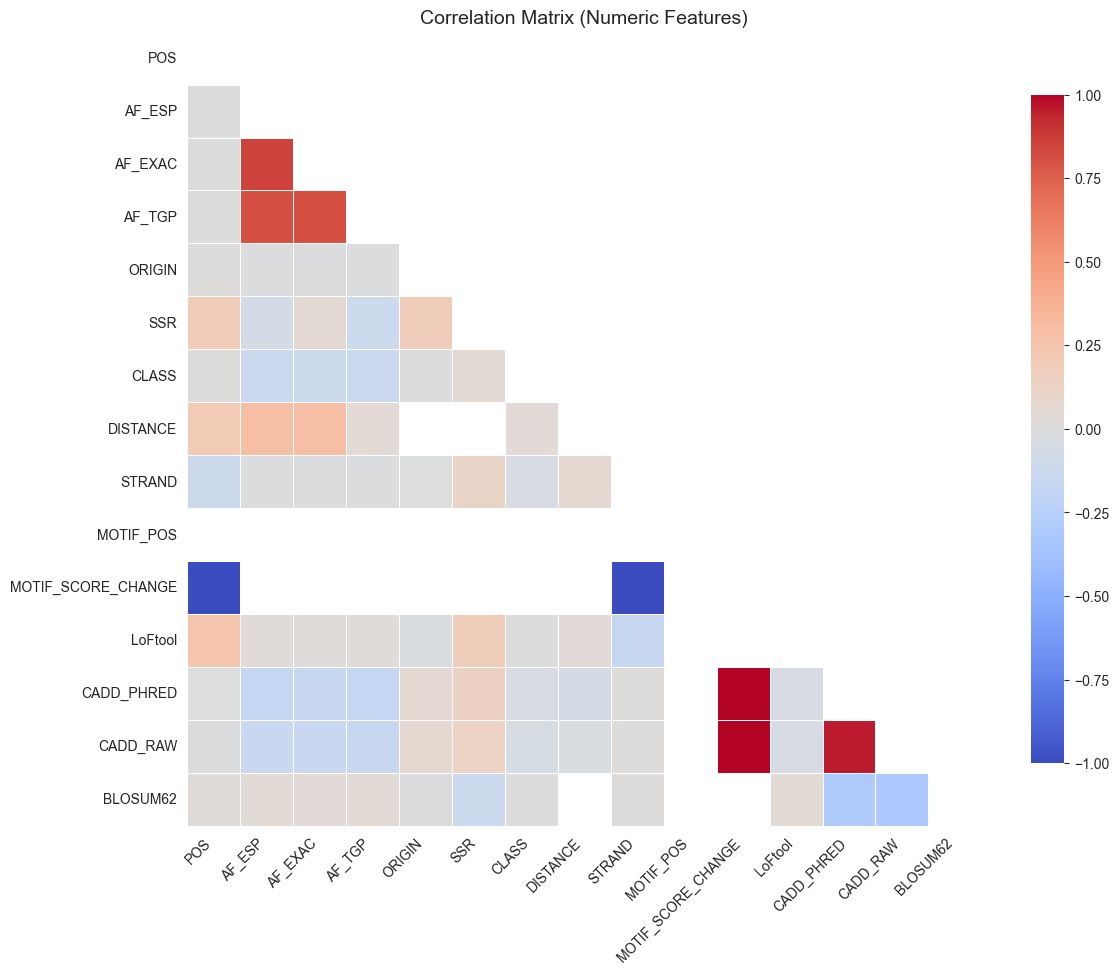

In [98]:
# Matriu de correlacio (variables numeriques)
num_df = df.select_dtypes(include=[np.number]).copy()
corr = num_df.corr()
sns.set_style("white")  

# Mascara per ocultar el triangle superior
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix (Numeric Features)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [42]:
class_corr.head(15)


CLASS                 1.000000
SSR                   0.042410
DISTANCE              0.036865
POS                   0.012061
ORIGIN                0.004357
BLOSUM62              0.001593
LoFtool               0.000045
STRAND               -0.031369
CADD_PHRED           -0.037713
CADD_RAW             -0.053485
AF_EXAC              -0.121213
AF_ESP               -0.126538
AF_TGP               -0.130077
MOTIF_POS                  NaN
MOTIF_SCORE_CHANGE         NaN
Name: CLASS, dtype: float64

## Variables categòriques i taxa de conflicte (CLASS)

Els gràfics mostren, per a cada categoria d’una variable, la proporció de variants conflictives (**CLASS=1**) mitjançant les barres blaves, i el nombre total de registres disponibles mitjançant la línia taronja.

La interpretació correcta requereix considerar simultàniament ambdues dimensions: una taxa de conflicte elevada en una categoria amb pocs casos pot ser deguda a soroll estadístic, mentre que diferències observades en categories amb molts registres són més robustes i fiables.

En general, es detecta que algunes variables funcionals (com **IMPACT**, **SIFT** o **PolyPhen**) mostren variacions moderades en la taxa de conflicte entre categories. Això suggereix que el tipus d’anotació funcional podria estar relacionat amb la probabilitat de desacord entre laboratoris. 

En variables d’alta cardinalitat com **SYMBOL**, les diferències s’han d’interpretar amb cautela, ja que poden reflectir el volum de submissions o la complexitat clínica associada a determinats gens més que un efecte biològic directe.

En conjunt, aquests resultats indiquen que una part del senyal predictiu es troba en variables categòriques, especialment quan les diferències de taxa es donen en categories amb volum de dades suficient.

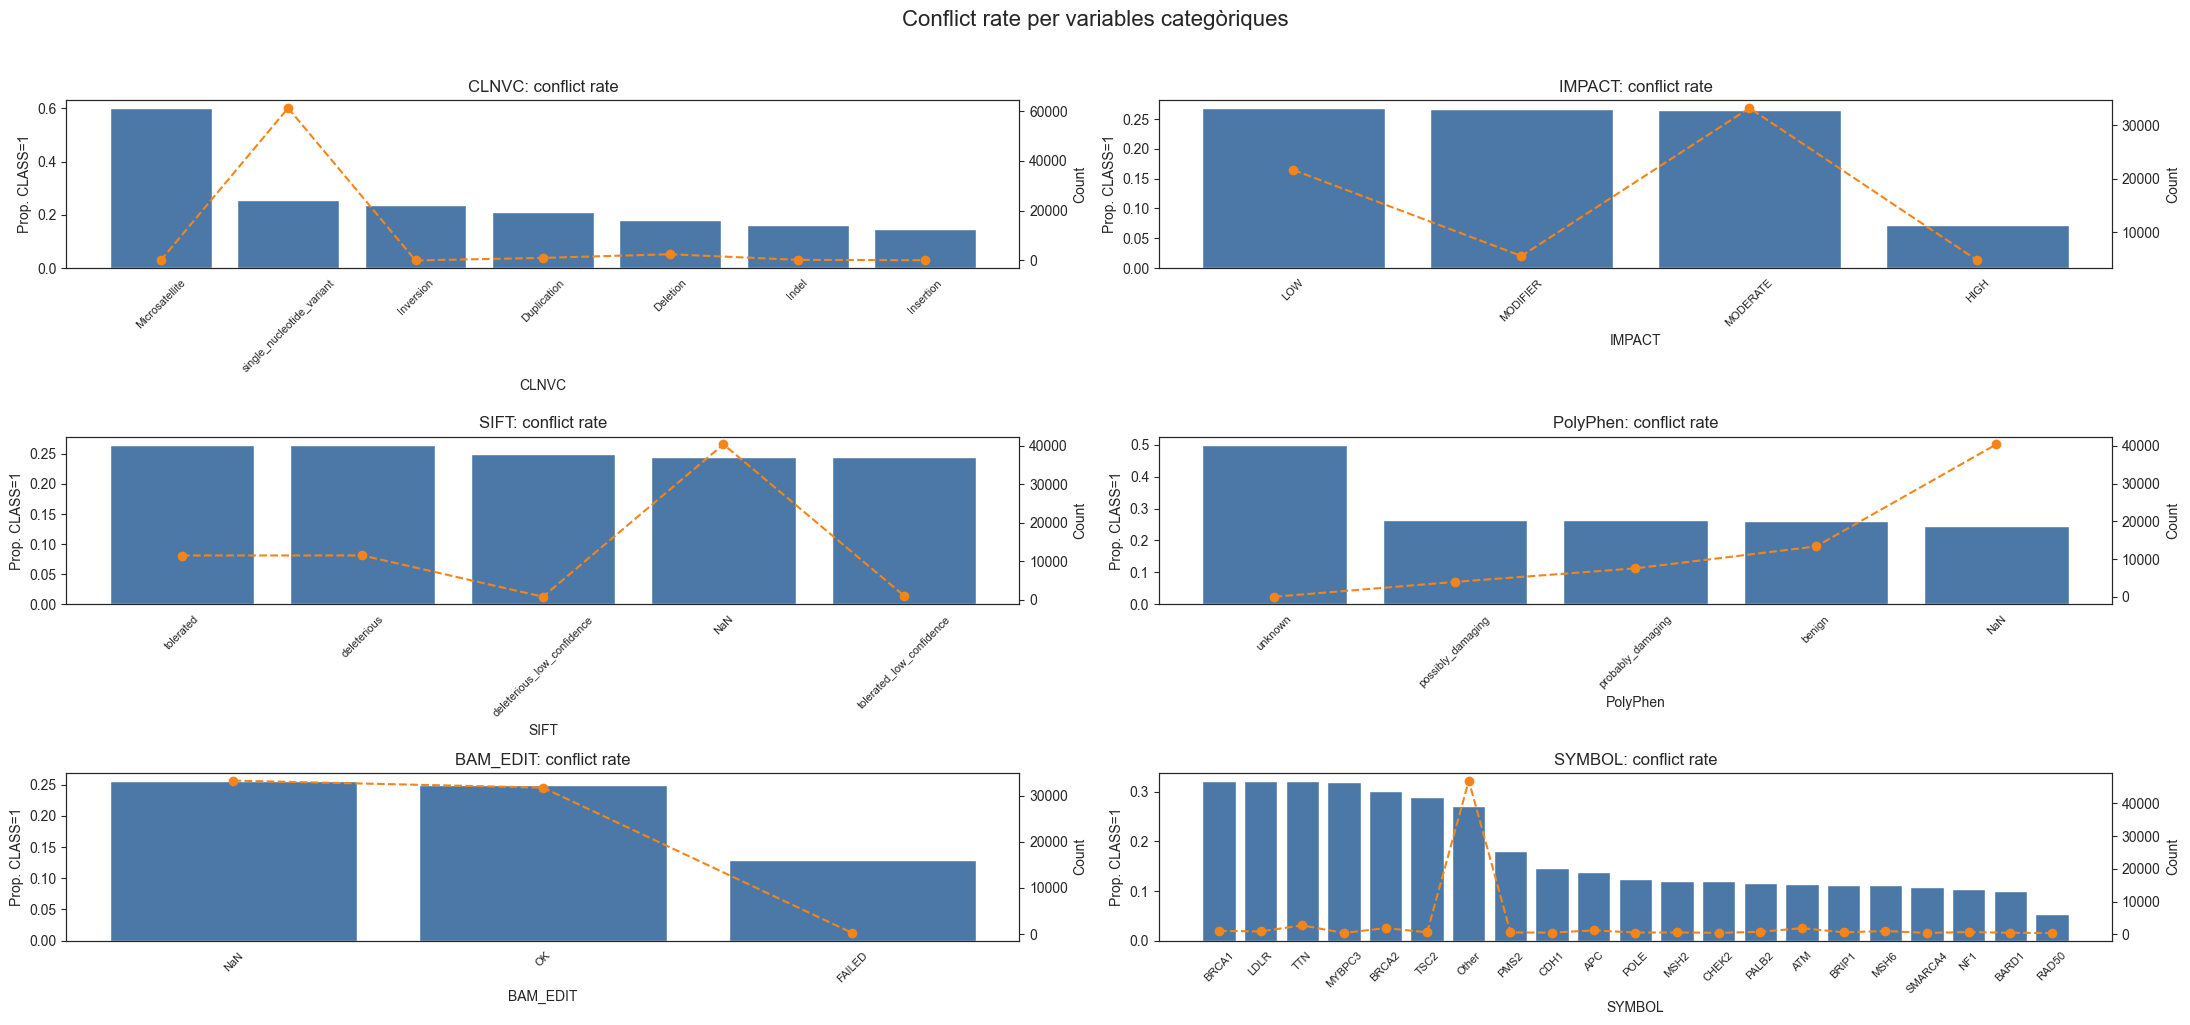

In [100]:
sns.set_style("white")

def plot_conflict_rate_cat(ax, df, col, target="CLASS", top_n=15):
    tmp = df[[col, target]].copy()
    tmp[col] = tmp[col].astype("object").fillna("NaN")

    # Si hi ha massa categories, agrupem les no principals a "Other"
    vc = tmp[col].value_counts()
    if vc.shape[0] > top_n:
        top = vc.head(top_n).index
        tmp[col] = np.where(tmp[col].isin(top), tmp[col], "Other")

    rate = tmp.groupby(col)[target].mean().sort_values(ascending=False)
    cnt = tmp[col].value_counts().reindex(rate.index)

    ax.bar(rate.index.astype(str), rate.values, color="#4C78A8")
    ax.set_title(f"{col}: conflict rate")
    ax.set_ylabel("Prop. CLASS=1")
    ax.set_xlabel(col)
    ax.tick_params(axis="x", rotation=45, labelsize=8)

    # Segon eix per veure volum de mostres per categoria
    ax2 = ax.twinx()
    ax2.plot(range(len(cnt)), cnt.values, marker="o", linestyle="--", color="#F58518", linewidth=1.5)
    ax2.set_ylabel("Count")

# 6 grafics en graella 2x3
vars_to_plot = [
    ("CLNVC", 10),
    ("IMPACT", 10),
    ("SIFT", 10),
    ("PolyPhen", 10),
    ("BAM_EDIT", 10),
    ("SYMBOL", 20),
]

available = [(c, n) for c, n in vars_to_plot if c in df.columns]

fig, axes = plt.subplots(3, 2, figsize=(22, 10))
axes = axes.flatten()

for i, (col, top_n) in enumerate(available[:6]):
    plot_conflict_rate_cat(axes[i], df, col, top_n=top_n)

# Si en falten, amaguem els subplots buits
for j in range(len(available[:6]), 6):
    axes[j].axis("off")

fig.suptitle("Conflict rate per variables categòriques", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()



## Particio de dades (train/validation/test)

Es defineix una particio fixa per garantir comparacions justes entre models:
- 90% per **train_val** i 10% per **test**
- del **train_val**, 10% per **validation**
- mateixa **random_state** en tots els splits

In [57]:
# Particio de dades fixa per a tots els models
from sklearn.model_selection import train_test_split

TARGET_COL = "CLASS"
RANDOM_STATE = 42
TEST_SIZE = 0.10
VAL_SIZE_WITHIN_TRAIN = 0.10

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# Primera particio: 90% train_val i 10% test (estratificat)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y,
)

# Segona particio: del train_val, 10% per validacio (estratificat)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=VAL_SIZE_WITHIN_TRAIN,
    random_state=RANDOM_STATE,
    stratify=y_train_val,
)

